In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from analysis import PandasAnalysis

In [2]:
babies = glob.glob("../analysis/studies/onelep/output/Run2/*.root")
babies

['../analysis/studies/onelep/output/Run2/VHToNonbb.root',
 '../analysis/studies/onelep/output/Run2/TTbar2L.root',
 '../analysis/studies/onelep/output/Run2/Bosons.root',
 '../analysis/studies/onelep/output/Run2/TTbar1L.root',
 '../analysis/studies/onelep/output/Run2/TTX.root',
 '../analysis/studies/onelep/output/Run2/WJets.root',
 '../analysis/studies/onelep/output/Run2/VBSWH_mkW.root']

In [3]:
vbswh = PandasAnalysis(
    sig_root_files=babies[-1:],
    bkg_root_files=babies[:-1],
    ttree_name="tree",
    weight_columns=["xsec_sf"]
)

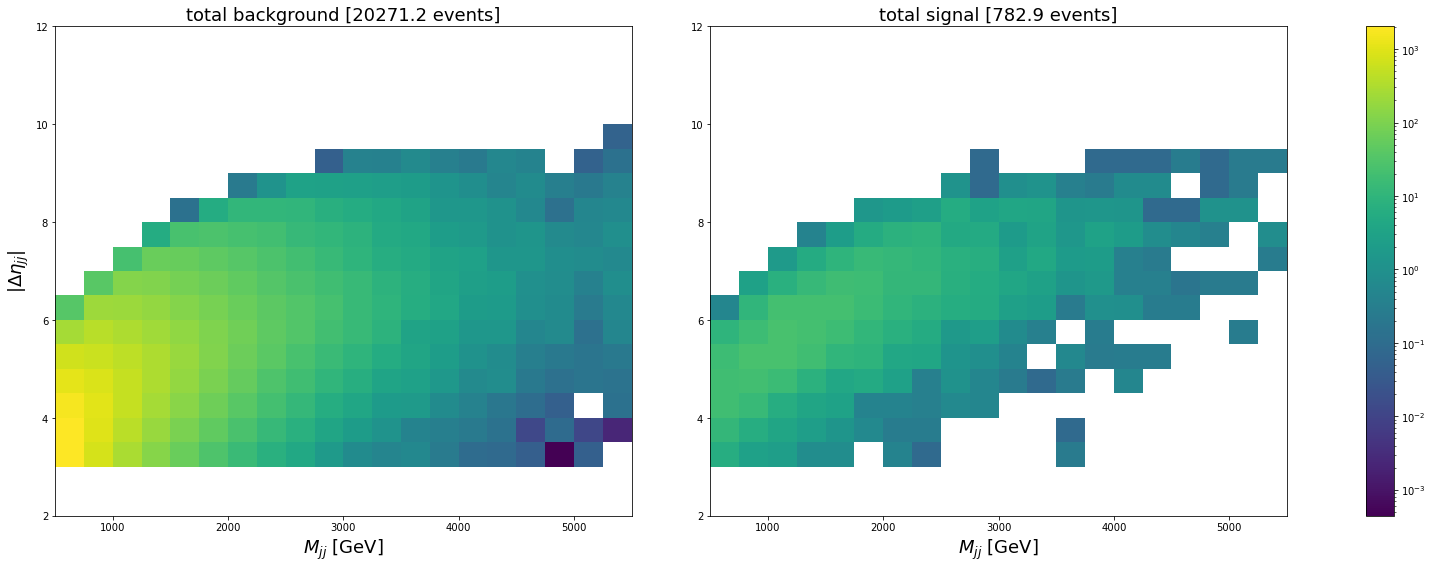

In [4]:
vbswh.plot_sig_vs_bkg_2D(
    "M_jj", "deta_jj", np.linspace(500, 5500, 21), np.linspace(2, 12, 21), 
    xabs=False, yabs=True, xlabel="$M_{jj}$ [GeV]", ylabel="$|\Delta\eta_{jj}|$", logz=True
);

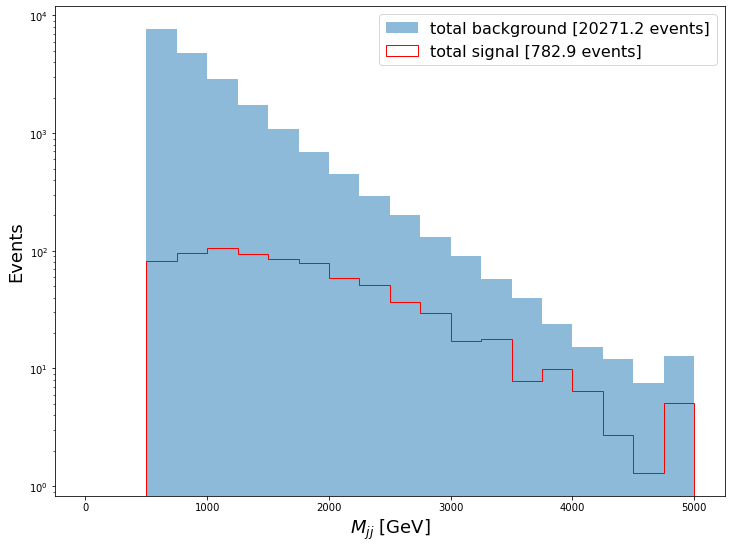

In [5]:
vbswh.plot_sig_vs_bkg("M_jj", np.linspace(0, 5000, 21), xlabel="$M_{jj}$ [GeV]", logy=True);

In [6]:
vbswh.fom_scan("M_jj", [1000, 1500, 2000, 2500], operator=">", base_selection="")

sel,sig,bkg,fom
M_jj > 1000,606.2571931406856,7731.959328322995,6.894648404237922
M_jj > 1500,408.0036117732525,3104.978333410835,7.322084231780392
M_jj > 2000,244.28757148236036,1330.5461326945529,6.69709413727581
M_jj > 2500,134.3882504031062,589.1824203270835,5.536514094285269


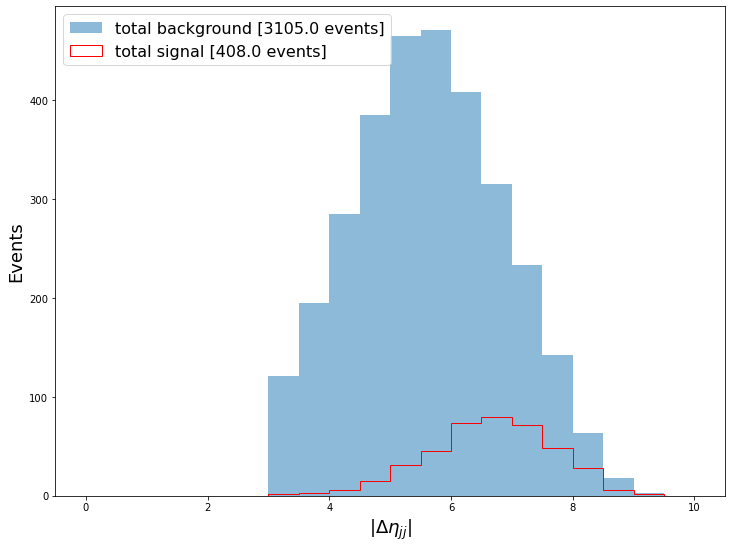

In [7]:
vbswh.plot_sig_vs_bkg(
    "deta_jj", np.linspace(0, 10, 21), 
    selection="M_jj > 1500", 
    xlabel="$|\Delta\eta_{jj}|$",
    abs=True
);

In [8]:
vbswh.fom_scan(
    "deta_jj", [3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7], operator=">", 
    base_selection="M_jj > 1500", abs=True
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 3.5,406.4746805354953,2984.1051195075934,7.440916645768858
M_jj > 1500 and abs(deta_jj) > 4,403.9216145053506,2789.559019220186,7.647673112633145
M_jj > 1500 and abs(deta_jj) > 4.5,398.5441941767931,2504.9537543239344,7.962998440266593
M_jj > 1500 and abs(deta_jj) > 5,383.99903203547,2119.7402664914607,8.340436971533197
M_jj > 1500 and abs(deta_jj) > 5.5,352.8856238871813,1654.8102015939492,8.674808000406026
M_jj > 1500 and abs(deta_jj) > 6,307.70159711688757,1183.2470589580767,8.945240751148994
M_jj > 1500 and abs(deta_jj) > 6.5,234.21319618821144,775.4227899975299,8.410892460686542
M_jj > 1500 and abs(deta_jj) > 7,154.3551746159792,460.01170819212183,7.196755537851808


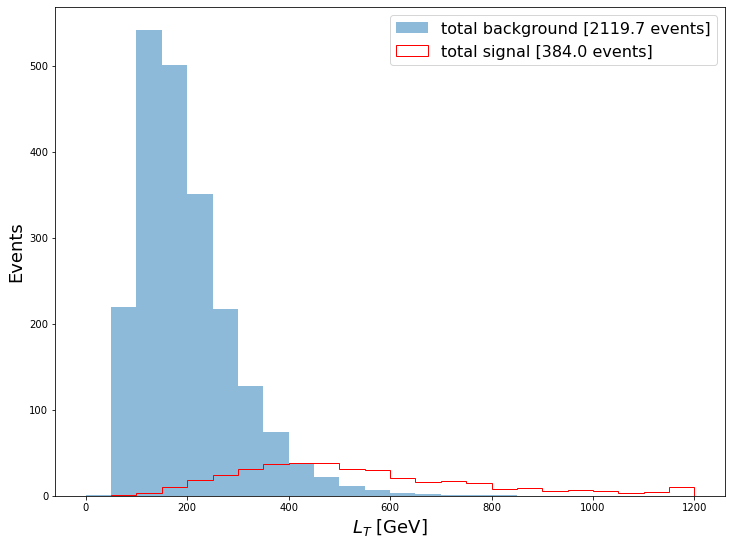

In [9]:
vbswh.plot_sig_vs_bkg(
    "LT", np.linspace(0, 1200, 25), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", xlabel="$L_T$ [GeV]"
);

In [10]:
vbswh.fom_scan(
    "LT", [500, 600, 700, 800, 900, 1000, 1100, 1200], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
);

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and LT > 500,181.8056903705001,25.952731455295407,35.687484396440674
M_jj > 1500 and abs(deta_jj) > 5 and LT > 600,121.160968080163,7.914244433211252,43.068327315403316
M_jj > 1500 and abs(deta_jj) > 5 and LT > 700,85.35624697059393,2.566607266679057,53.278943158281706
M_jj > 1500 and abs(deta_jj) > 5 and LT > 800,53.69714563339949,0.962359213430318,54.737202320439685
M_jj > 1500 and abs(deta_jj) > 5 and LT > 900,36.30406265705824,0.33119872158567887,63.082791355119745
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1000,23.54340899735689,0.12128388670680579,67.60328413013106
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1100,15.26379831135273,0.1132823509251466,45.35043865983977
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1200,8.629904136061668,0.07257327034312766,32.0344759995014


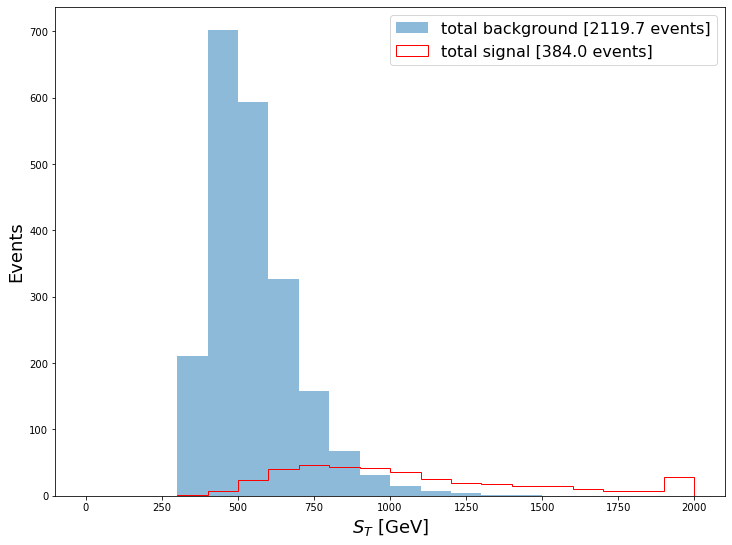

In [11]:
axes = vbswh.plot_sig_vs_bkg(
    "ST", np.linspace(0, 2000, 21), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", xlabel="$S_T$ [GeV]"
);
axes.set_ylim(ymin=0);

In [12]:
vbswh.fom_scan(
    "ST", [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1000,180.3400532901287,28.91762153917557,33.535972812395094
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1100,144.587591804564,13.809945295085754,38.90765401119678
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1200,119.085952937603,6.941973481280002,45.1979836929605
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300,99.89154370129108,3.327314890582784,54.76231170034834
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1400,82.3062400072813,1.4064557823767245,69.4016380227646
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1500,67.59755023568869,0.6498238375206711,83.85580606035715
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1600,53.33581764996052,0.27775136863056105,101.20240970392628
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1700,43.10148446261883,0.06656707923684735,167.0561533501388
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1800,36.052833557128906,0.10535725844965782,111.07266010870347
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1900,28.403829224407673,0

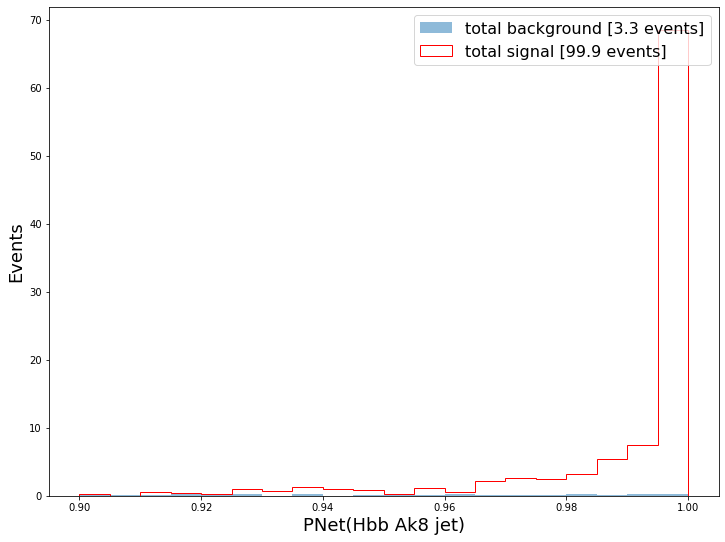

In [13]:
vbswh.plot_sig_vs_bkg(
    "hbbjet_score", np.linspace(0.9, 1.0, 21), 
    selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300", 
    xlabel="PNet(Hbb Ak8 jet)"
);

In [14]:
vbswh.fom_scan(
    "hbbjet_score", np.linspace(0.91, 0.99, 9), operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.91,99.63914547860622,2.9120177451077325,58.38926195053755
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.92,98.69953313469887,2.573636411831103,61.52356632918299
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.93,97.50752256810665,2.1432872932164173,66.60363430516246
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.9400000000000001,95.56383460015059,1.8396688036264095,70.45693489562595
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.95,93.76244597136974,1.7551314193515282,70.77405966137529
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.96,92.39587324112654,1.5252026447960816,74.81502054344489
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.97,89.67493143677711,1.1160152484408172,84.88598432446808
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.98,84.56996849924326,

In [15]:
def lepton_charge_plot(vbswh, selection=None):
    fig, axes = plt.subplots(figsize=(12, 9))

    bkg_df = vbswh.bkg_df(selection=selection)
    sig_df = vbswh.sig_df(selection=selection)

    bkg_counts, _, _ = axes.hist(
        (bkg_df.lep_pdgID > 0).astype(int),
        bins=[0, 1, 2],
        alpha=0.5,
        weights=np.ones(len(bkg_df))/len(bkg_df),
        label=f"total background [{bkg_df.event_weight.sum():0.1f}]"
    );
    axes.text(0.5, bkg_counts[0]+0.01, f"{bkg_counts[0]:0.2f}", size=16, ha="center")
    axes.text(1.5, bkg_counts[1]+0.01, f"{bkg_counts[1]:0.2f}", size=16, ha="center")

    sig_counts, _, _ = axes.hist(
        (sig_df.lep_pdgID > 0).astype(int),
        bins=[0, 1, 2],
        histtype="step",
        color="r",
        weights=np.ones(len(sig_df))/len(sig_df),
        label=f"total signal [{sig_df.event_weight.sum():0.1f}]"
    );
    axes.text(0.5, sig_counts[0]+0.01, f"{sig_counts[0]:0.2f}", size=16, ha="center")
    axes.text(1.5, sig_counts[1]+0.01, f"{sig_counts[1]:0.2f}", size=16, ha="center")

    axes.set_ylabel("Events/Total", size=18)
    axes.set_xticks([0.5, 1.5]);
    axes.set_xticklabels(["$\ell^{+}$", "$\ell^{-}$"], size=18);

    axes.legend(fontsize=16);

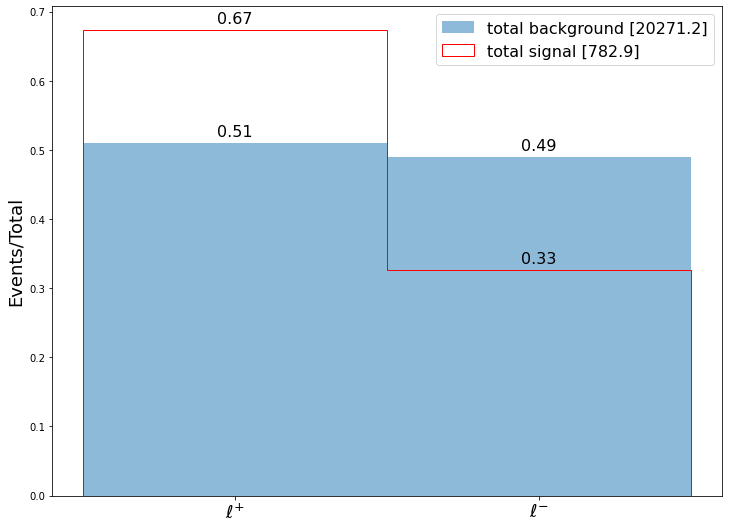

In [16]:
lepton_charge_plot(vbswh)

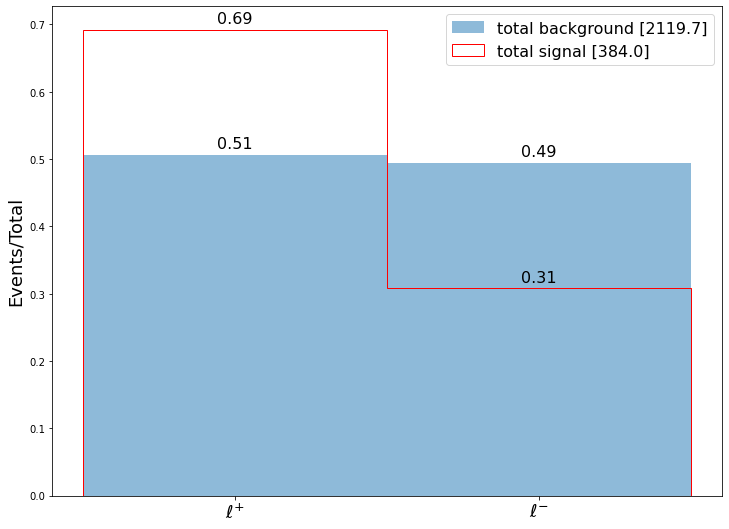

In [17]:
lepton_charge_plot(vbswh, selection="M_jj > 1500 and abs(deta_jj) > 5")

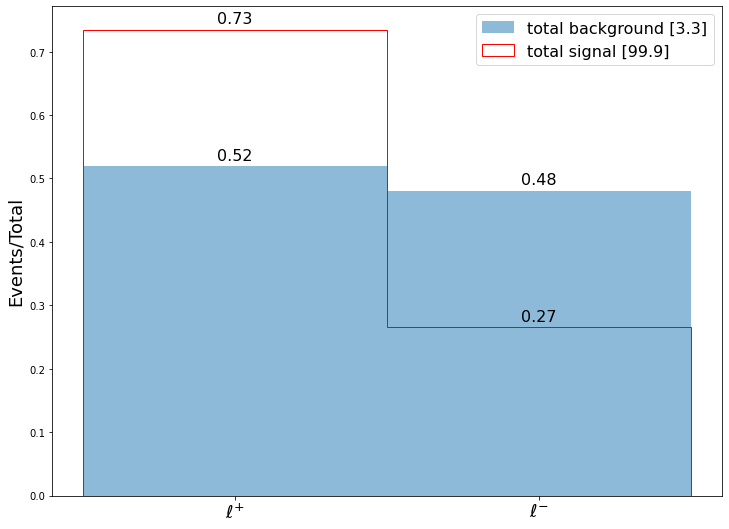

In [18]:
lepton_charge_plot(vbswh, selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300")